<a href="https://colab.research.google.com/github/hugueds/tensorflow-course/blob/master/80_RNN_on_a_Sine_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RNN on a Sine Wave

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
x = np.linspace(0,50, 501)
x[:10]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [40]:
y = np.sin(x)
y[:10]

array([0.        , 0.09983342, 0.19866933, 0.29552021, 0.38941834,
       0.47942554, 0.56464247, 0.64421769, 0.71735609, 0.78332691])

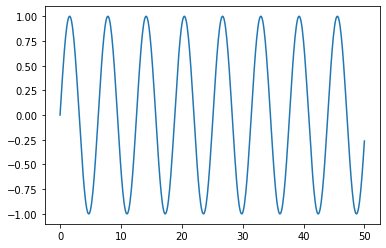

In [41]:
plt.plot(x,y)

In [0]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [43]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [44]:
len(df)

501

In [45]:
test_percent = 0.1
test_point = np.round(len(df) * test_percent)
print(test_point)

50.0


In [0]:
test_index = int(len(df) - test_point)

In [47]:
test_index

451

In [0]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc = MinMaxScaler()

In [51]:
sc.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_train = sc.transform(train)
scaled_test = sc.transform(test)

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [0]:
length = 49
batch_size = 1
gen = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
val_gen = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)

In [0]:
X, y = gen[0]

In [0]:
X[:10]

In [57]:
y

array([[0.02053313]])

In [58]:
scaled_train[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
es = EarlyStopping(monitor='val_loss', patience=2)

In [0]:
model = Sequential()

In [0]:
n_features = 1
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [97]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.fit_generator(gen, epochs=6, validation_data=val_gen, callbacks=[es])

Epoch 1/6
402/402 [==============================] - 18s 44ms/step - loss: 0.0172 - val_loss: 7.5191e-05
Epoch 2/6
402/402 [==============================] - 16s 39ms/step - loss: 9.1760e-05 - val_loss: 5.3368e-05
Epoch 3/6
402/402 [==============================] - 16s 39ms/step - loss: 3.7214e-04 - val_loss: 3.5174e-04
Epoch 4/6
402/402 [==============================] - 16s 39ms/step - loss: 7.4761e-05 - val_loss: 2.8041e-05
Epoch 5/6
402/402 [==============================] - 16s 39ms/step - loss: 1.6422e-04 - val_loss: 4.6039e-05
Epoch 6/6
402/402 [==============================] - 16s 39ms/step - loss: 1.7908e-04 - val_loss: 4.8081e-06


In [0]:
losses = pd.DataFrame(model.history.history)

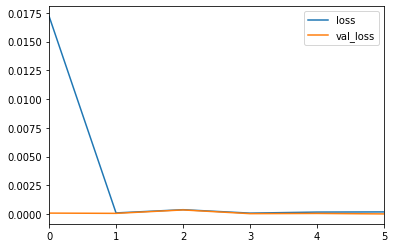

In [100]:
losses.plot()

In [0]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length, n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]
  test_pred.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)



In [0]:
true_p = sc.inverse_transform(test_pred)

In [103]:
test['Pred'] = true_p

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
test

,Sine,Pred
45.1,0.899097,0.911355
45.2,0.938307,0.950016
45.3,0.968142,0.979117
45.4,0.988304,0.998195
45.5,0.998591,1.006951
45.6,0.998900,1.005282
45.7,0.989229,0.993247
45.8,0.969673,0.971035
45.9,0.940429,0.938951
46.0,0.901788,0.897393


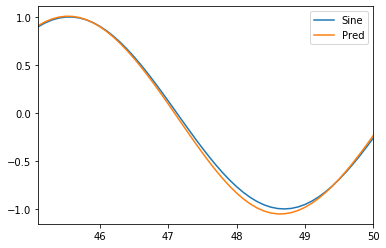

In [105]:
test.plot()

In [0]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [109]:
length = 49
batch_size = 1

full_gen = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=batch_size)



n_features = 1
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit_generator(full_gen, epochs=6)


Epoch 1/6
452/452 [==============================] - 20s 44ms/step - loss: 0.0154
Epoch 2/6
452/452 [==============================] - 19s 41ms/step - loss: 1.1581e-04
Epoch 3/6
452/452 [==============================] - 19s 41ms/step - loss: 3.2389e-04
Epoch 4/6
452/452 [==============================] - 18s 41ms/step - loss: 5.0554e-05
Epoch 5/6
452/452 [==============================] - 19s 41ms/step - loss: 8.8231e-04
Epoch 6/6
452/452 [==============================] - 19s 41ms/step - loss: 3.3052e-05


In [0]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length, n_features))

for i in range((100)):

  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [0]:
forecast = full_scaler.inverse_transform(forecast)

In [124]:
forecast_index = np.arange(50.1, 60.1, step=0.1)
len(forecast_index)

100

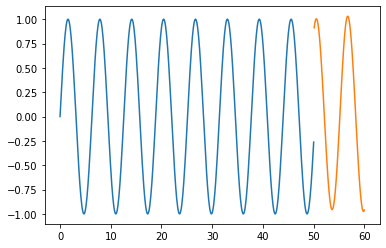

In [125]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)